In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import bilby
import numpy as np

import hphc14
#import hphc11

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

%matplotlib inline

In [2]:
sampling_frequency = 1024.0
duration = 4.0

In [21]:
bilby.gw.waveform_generator.WaveformGenerator.

bilby.gw.waveform_generator.WaveformGenerator

In [3]:
def eccentric_waveform(frequency_array_, chirp_mass, mass_ratio, eccentricity, luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec):
    
    mass_1 = (chirp_mass*(1+mass_ratio)**(1/5))/mass_ratio**(3/5)
    mass_2 = chirp_mass*mass_ratio**(2/5)*(1+mass_ratio)**(1/5)
    luminosity_distance = luminosity_distance*Mpc
    total_mass = (mass_1+mass_2)*Mo
    symmetric_mass_ratio = (mass_1*mass_2)/((mass_1+mass_2)**2)
    maximum_f = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
    minimum_f = 20.0
    mass_diff = (mass_1-mass_2)*Mo
    
    foo = np.array(frequency_array_)

    arg_plus = {'iota_':theta_jn, 'beta_':psi, 'D_':luminosity_distance , \
                'farray_':foo, 'f0_':20.0, 'et0_':eccentricity, 'phic_':phase, \
                'tc_':geocent_time, 'M_':total_mass, 'eta_':symmetric_mass_ratio, \
                'ff_':maximum_f, 'delta_':mass_diff}

    fplus = hphc14.Fn(**arg_plus)

    h_plus = fplus.htilde()[0]
    h_cross = fplus.htilde()[1]

    return {'plus': h_plus, 'cross': h_cross}

In [4]:
injection_parameters = dict(chirp_mass=19.564163812778446, mass_ratio=0.9148936170212766, eccentricity=0.1, luminosity_distance=200.0, theta_jn=0.4, psi=0.1, phase=1.2, geocent_time=1180002601.0, ra=45.0, dec=5.73)

In [5]:
eccentric_waveform([30,40,50],19.564163812778446,0.9148936170212766,0.1,200.0,0.4,0.1,1.2,1180002601.0,45,5.73)

{'plus': array([-5.36029112e-23+3.18179166e-23j,
        -3.64941971e-23+2.33325147e-23j,
         3.27331426e-23+1.31537610e-23j]),
 'cross': array([-3.17752409e-23-5.34641083e-23j,
        -2.32564747e-23-3.63700052e-23j,
        -1.31116592e-23+3.26272999e-23j])}

In [7]:
# Now we pass our source function to the WaveformGenerator
waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=eccentric_waveform)

13:18 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: __main__.eccentric_waveform
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [8]:
# Set up interferometers.
#maximum_f = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
minimum_frequency = 20.0+3.0
MM1 = 25.0
MM2 = 25.0
maximum_frequency = (C**3)/( G*(MM1+MM2)*Mo*np.pi*6**(3/2) )-3.0

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time'] - 3)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

13:18 bilby INFO    : Injected signal in H1:
13:18 bilby INFO    :   optimal SNR = 85.84
13:18 bilby INFO    :   matched filter SNR = 85.52+1.39j
13:18 bilby INFO    :   chirp_mass = 19.564163812778446
13:18 bilby INFO    :   mass_ratio = 0.9148936170212766
13:18 bilby INFO    :   eccentricity = 0.1
13:18 bilby INFO    :   luminosity_distance = 200.0
13:18 bilby INFO    :   theta_jn = 0.4
13:18 bilby INFO    :   psi = 0.1
13:18 bilby INFO    :   phase = 1.2
13:18 bilby INFO    :   geocent_time = 1180002601.0
13:18 bilby INFO    :   ra = 45.0
13:18 bilby INFO    :   dec = 5.73
13:18 bilby INFO    : Injected signal in L1:
13:18 bilby INFO    :   optimal SNR = 50.48
13:18 bilby INFO    :   matched filter SNR = 50.57-0.84j
13:18 bilby INFO    :   chirp_mass = 19.564163812778446
13:18 bilby INFO    :   mass_ratio = 0.9148936170212766
13:18 bilby INFO    :   eccentricity = 0.1
13:18 bilby INFO    :   luminosity_distance = 200.0
13:18 bilby INFO    :   theta_jn = 0.4
13:18 bilby INFO    :   p

[{'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

13:18 bilby INFO    : Injected signal in H1:
13:18 bilby INFO    :   optimal SNR = 85.84
13:18 bilby INFO    :   matched filter SNR = 171.36+1.39j
13:18 bilby INFO    :   chirp_mass = 19.564163812778446
13:18 bilby INFO    :   mass_ratio = 0.9148936170212766
13:18 bilby INFO    :   eccentricity = 0.1
13:18 bilby INFO    :   luminosity_distance = 200.0
13:18 bilby INFO    :   theta_jn = 0.4
13:18 bilby INFO    :   psi = 0.1
13:18 bilby INFO    :   phase = 1.2
13:18 bilby INFO    :   geocent_time = 1180002601.0
13:18 bilby INFO    :   ra = 45.0
13:18 bilby INFO    :   dec = 5.73
13:18 bilby INFO    : Injected signal in L1:
13:18 bilby INFO    :   optimal SNR = 50.48
13:18 bilby INFO    :   matched filter SNR = 101.05-0.84j
13:18 bilby INFO    :   chirp_mass = 19.564163812778446
13:18 bilby INFO    :   mass_ratio = 0.9148936170212766
13:18 bilby INFO    :   eccentricity = 0.1
13:18 bilby INFO    :   luminosity_distance = 200.0
13:18 bilby INFO    :   theta_jn = 0.4
13:18 bilby INFO    :  

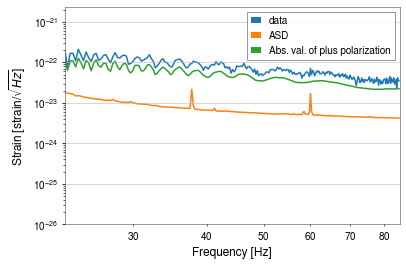

In [9]:
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["cross"][idxs]),
          label="Abs. val. of plus polarization")

ax.set_xlim(minimum_frequency,maximum_frequency)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [13]:
#17.411011265922482,19.441935582935383,21.7637640824031
prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = 19.564163812778446
prior['mass_ratio'] = 0.9148936170212766
prior['eccentricity'] = bilby.core.prior.LogUniform(name='eccentricity', minimum=0.01, maximum=0.2)
prior["luminosity_distance"] = 200.0
prior["theta_jn"] = 0.4
prior["psi"] = 0.1
prior["phase"] = 1.2
prior["geocent_time"] = 1180002601.0
prior["ra"] = 45.0
prior["dec"] = 5.73

In [14]:
# Initialising the likelihood function.
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator)

In [15]:
result = bilby.run_sampler(likelihood=likelihood, priors=prior, sampler='dynesty', outdir='short', label="eccn", nlive=500, dlogz=3, npool=1)

15:02 bilby INFO    : Running for label 'eccn', output will be saved to 'short'
15:02 bilby INFO    : Using lal version 7.1.2
15:02 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v6.82;Id: cf792129c2473f42ce6c6ee21d8234254cefd337;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
15:02 bilby INFO    : Using lalsimulation version 2.5.1
15:02 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v6.82;Id: cf792129c2473f42ce6c6ee21d8234254cefd337;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
15:02 bilby INFO    : Search parameters:
15:02 bilby INFO    :   eccentricity = LogUniform(minimum=0.01, maximum=0.2, name='eccentricity', latex_label='eccentricity', unit=None, boundary=None)
15:02 bilby INFO    :   chirp_mass = 19.564163812778446
15:02 bilby INFO    :   mass_ratio = 0.9148936170212766
15:02 bilby INFO    :   luminosity_distance = 200.0
15:02 bilby INFO    :   theta_jn = 0.4
15:02 bilby INFO


0it [00:00, ?it/s]

15:06 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7fd89fd2c690>>, 'dlogz': 3, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
15:06 bilby INFO    : Checkpoint every check_point_delta_t = 600s
15:06 bilby INFO    : Using dynesty version 1.0.1
15:06 bilby INFO    : Generating initial points from the prior


1863it [4:44:13,  9.15s/it, bound:23 nc:382 ncall:2.8e+04 eff:6.8% logz-ratio=3633.33+/-0.17 dlogz:11164.137>3]
1865it [4:44:13,  6.42s/it, bound:25 nc:  1 ncall:2.8e+04 eff:7.3% logz-ratio=3695.03+/-0.17 dlogz:11101.599>3]

19:51 bilby INFO    : Written checkpoint file short/eccn_resume.pickle


IndexError: list index out of range